### Nama Anggota :
### Gian Maxmillian Firdaus
### Donny Triartahsasta
### Egar Pambudi

### ITS-02 Kelompok 2

## Analisis Data Mortality dan Vaksinasi Dunia yang diakibatkan oleh Covid-19
------------------------------------------

### Tahap 1: Load Modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings('ignore') 

### Tahap 2: Import data set covid-19

In [2]:
# Data on COVID-19 (coronavirus) by Our World in Data (https://ourworldindata.org/coronavirus-source-data)
df = pd.read_csv("owid-covid-data.csv") 
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136024,ZWE,Africa,Zimbabwe,2021-11-22,133674.0,27.0,33.714,4699.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
136025,ZWE,Africa,Zimbabwe,2021-11-23,133674.0,0.0,24.143,4699.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
136026,ZWE,Africa,Zimbabwe,2021-11-24,133747.0,73.0,27.143,4703.0,4.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
136027,ZWE,Africa,Zimbabwe,2021-11-25,133774.0,27.0,25.857,4704.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
# info struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136029 entries, 0 to 136028
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    136029 non-null  object 
 1   continent                                   127360 non-null  object 
 2   location                                    136029 non-null  object 
 3   date                                        136029 non-null  object 
 4   total_cases                                 128515 non-null  float64
 5   new_cases                                   128510 non-null  float64
 6   new_cases_smoothed                          127470 non-null  float64
 7   total_deaths                                117278 non-null  float64
 8   new_deaths                                  117474 non-null  float64
 9   new_deaths_smoothed                         127470 non-null  float64
 

In [4]:
# Ukuran file
df.shape

(136029, 67)

In [5]:
# Mengambil kolom yang diperlukan dalam pengolahan data
data = df[["location", "date","total_deaths_per_million","total_vaccinations_per_hundred","cardiovasc_death_rate"]]
data

,location,date,total_deaths_per_million,total_vaccinations_per_hundred,cardiovasc_death_rate
0,Afghanistan,2020-02-24,NaN,NaN,597.029
1,Afghanistan,2020-02-25,NaN,NaN,597.029
2,Afghanistan,2020-02-26,NaN,NaN,597.029
3,Afghanistan,2020-02-27,NaN,NaN,597.029
4,Afghanistan,2020-02-28,NaN,NaN,597.029
...,...,...,...,...,...
136024,Zimbabwe,2021-11-22,311.353,42.63,307.846
136025,Zimbabwe,2021-11-23,311.353,42.77,307.846
136026,Zimbabwe,2021-11-24,311.619,42.98,307.846
136027,Zimbabwe,2021-11-25,311.685,NaN,307.846


In [6]:
# total kemation dalam skala 1 juta
mortality = data.pivot(index="location", columns="date", values="total_deaths_per_million")
mortality

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.179,183.179,184.785,184.835,184.886,184.886,183.379,183.405,183.430,183.430
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160.984,161.070,161.184,161.259,161.341,161.427,161.560,161.664,161.821,161.900
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1049.102,1051.886,1054.323,1056.411,1056.411,1061.284,1062.677,1066.157,1067.898,1071.031
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.591,134.681,134.815,134.860,134.950,135.062,135.151,135.263,135.398,135.510
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1680.585,1680.585,1680.585,1680.585,1680.585,1680.585,1680.585,1693.513,1693.513,1693.513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,650.670,651.711,652.767,653.522,654.081,655.000,656.019,657.103,658.092,658.916
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.265,63.429,63.462,63.560,63.560,63.593,63.692,63.692,63.724,63.724


In [7]:
# total vaksinasi dalam skala 1000
vaccination = data.pivot(index="location", columns="date", values="total_vaccinations_per_hundred")
vaccination

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.84,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.92,16.23,16.25,16.43,16.57,16.64,16.72,16.97,16.98,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.50,70.79,NaN,NaN,71.37,NaN,NaN,72.21,72.46,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.92,26.97,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.29,NaN,NaN,NaN,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.66,97.04,97.44,97.87,98.19,98.54,98.92,99.35,99.65,NaN
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.47,NaN,NaN,NaN,2.49,NaN,NaN,NaN,NaN,NaN


In [8]:
#cardiovasc_death_rate merupakan salah satu penyebab kematian dunia
cardiovasc_death_rate = data.pivot(index="location", columns="date", values="cardiovasc_death_rate")
cardiovasc_death_rate

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003


### Tahap 3.1 : Pengolahan data mortality

In [9]:
#cek nilai yang hilang / missing values di dalam data
print(mortality.isna().sum())

date
2020-01-01    237
2020-01-02    237
2020-01-03    237
2020-01-04    237
2020-01-05    237
             ... 
2021-11-22     39
2021-11-23     39
2021-11-24     39
2021-11-25     39
2021-11-26     39
Length: 696, dtype: int64


In [10]:
# mengganti missing value dengan mean(), kemudian masukkan ke variabel
mortality = mortality.fillna(mortality.mean())
# bila mean() tidak ada atau Nan, gantikan dengan nol
mortality.fillna(0,inplace=True)
mortality

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.179000,183.179000,184.785000,184.835000,184.886000,184.886000,183.379000,183.405000,183.430000,183.430000
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.984000,161.070000,161.184000,161.259000,161.341000,161.427000,161.560000,161.664000,161.821000,161.900000
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1049.102000,1051.886000,1054.323000,1056.411000,1056.411000,1061.284000,1062.677000,1066.157000,1067.898000,1071.031000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.591000,134.681000,134.815000,134.860000,134.950000,135.062000,135.151000,135.263000,135.398000,135.510000
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1680.585000,1680.585000,1680.585000,1680.585000,1680.585000,1680.585000,1680.585000,1693.513000,1693.513000,1693.513000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,926.083258,928.353379,930.530566,932.013985,933.332288,936.001904,937.940924,940.218662,942.280616,944.246242
World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,650.670000,651.711000,652.767000,653.522000,654.081000,655.000000,656.019000,657.103000,658.092000,658.916000
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.265000,63.429000,63.462000,63.560000,63.560000,63.593000,63.692000,63.692000,63.724000,63.724000


In [11]:
# Ukuran baris dan kolom
mortality.shape

(237, 696)

### Tahap 3.1.1: Visualizing data mortality, contoh: Brazil, Peru, India, Indonesia, United States
Visualisasi penting untuk memahami data.

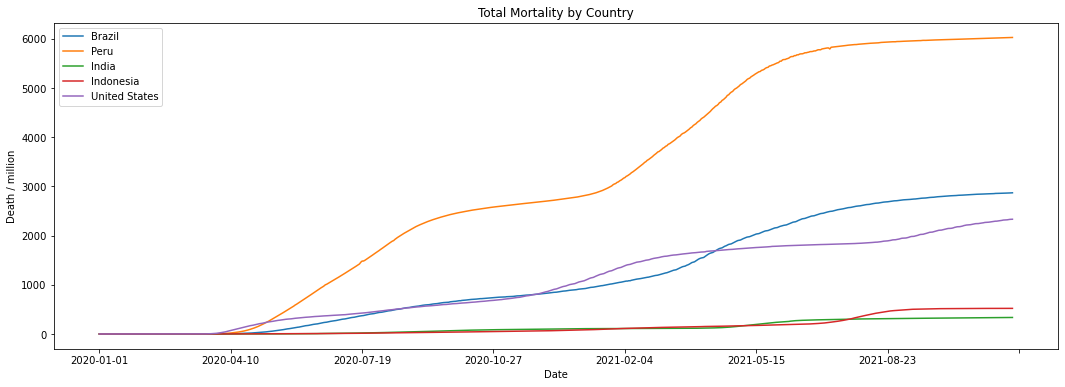

In [12]:
# Plotting data kematian secara keseluruhan sejak covid-19 dimulai sampai 26 November 2021
# Sampel negara: Brazil, Peru, India, Indonesia, United States
plt.figure(figsize=(18,6))
mortality.loc["Brazil"].plot()
mortality.loc["Peru"].plot()
mortality.loc["India"].plot()
mortality.loc["Indonesia"].plot()
mortality.loc["United States"].plot()
plt.title('Total Mortality by Country')
plt.xlabel('Date')
plt.ylabel('Death / million')
plt.legend()

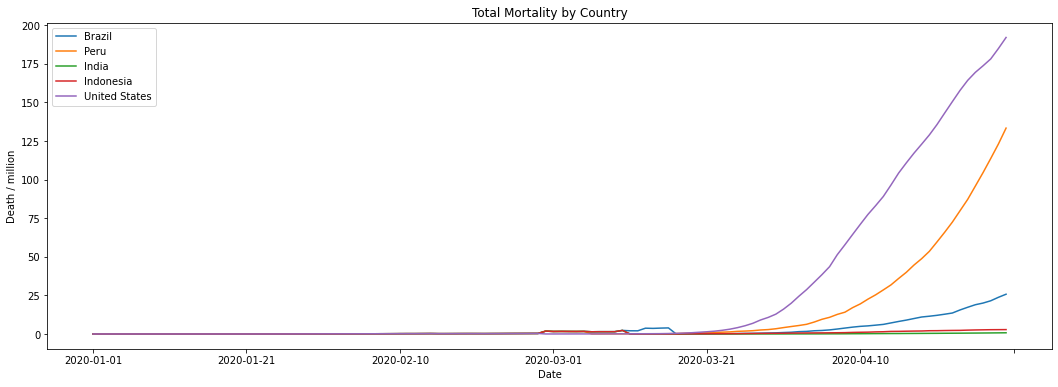

In [13]:
# Menganalisis data kematian 120 hari pertama sejak dimulainya penyebaran covid-19
plt.figure(figsize=(18,6))
mortality.loc["Brazil"][:120].plot()
mortality.loc["Peru"][:120].plot()
mortality.loc["India"][:120].plot()
mortality.loc["Indonesia"][:120].plot()
mortality.loc["United States"][:120].plot()
plt.title('Total Mortality by Country')
plt.xlabel('Date')
plt.ylabel('Death / million')
plt.legend()

### Tahap 3.1.2: Menghitung curva derivative 

Text(0, 0.5, 'Death / million')

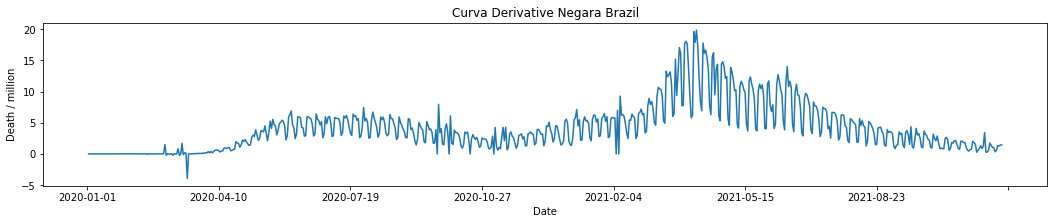

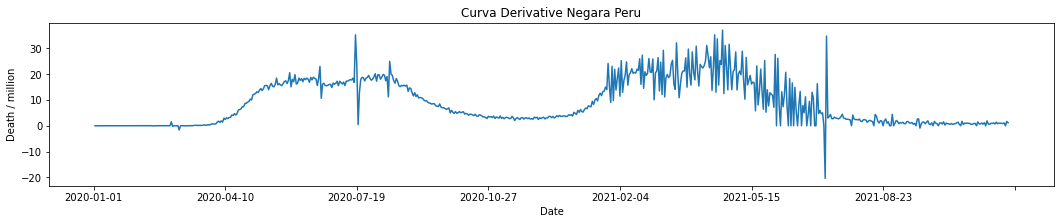

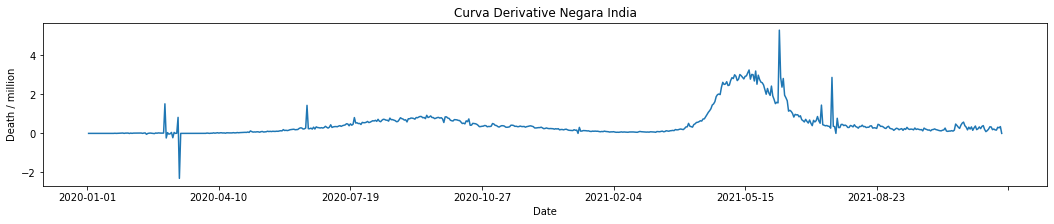

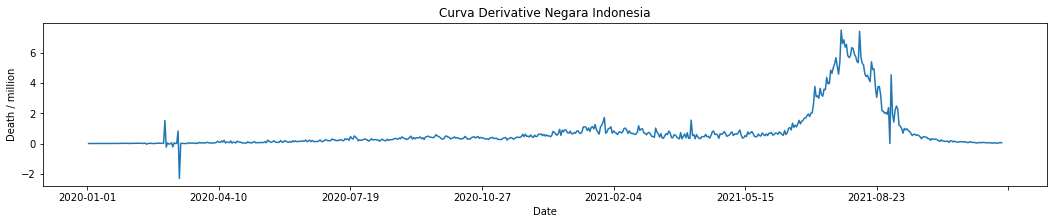

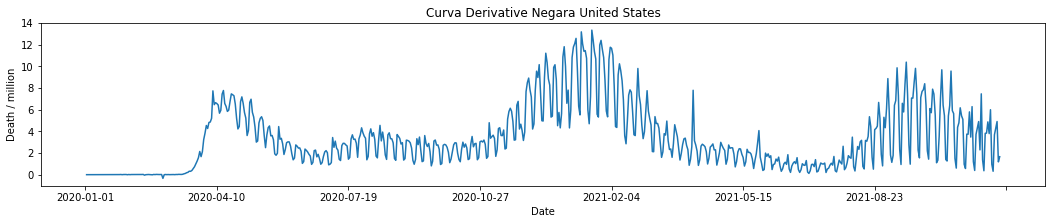

In [14]:
plt.figure(1,figsize=(18,3))
mortality.loc["Brazil"].diff().plot()
plt.title('Curva Derivative Negara Brazil')
plt.xlabel('Date')
plt.ylabel('Death / million')

plt.figure(2,figsize=(18,3))
mortality.loc["Peru"].diff().plot()
plt.title('Curva Derivative Negara Peru')
plt.xlabel('Date')
plt.ylabel('Death / million')

plt.figure(3,figsize=(18,3))
mortality.loc["India"].diff().plot()
plt.title('Curva Derivative Negara India')
plt.xlabel('Date')
plt.ylabel('Death / million')

plt.figure(4,figsize=(18,3))
mortality.loc["Indonesia"].diff().plot()
plt.title('Curva Derivative Negara Indonesia')
plt.xlabel('Date')
plt.ylabel('Death / million')

plt.figure(5,figsize=(18,3))
mortality.loc["United States"].diff().plot()
plt.title('Curva Derivative Negara United States')
plt.xlabel('Date')
plt.ylabel('Death / million')

### Tahap 3.1.3: Mencari rate infeksi yang mengakibatkan kematian

In [15]:
print("Rate Infection yang mengakibatkan kematian pada negara:")
print("Brazil: ",mortality.loc["Brazil"].diff().max())
print("Peru: ",mortality.loc["Peru"].diff().max())
print("India: ",mortality.loc["India"].diff().max())
print("Indonesia: ",mortality.loc["Indonesia"].diff().max())
print("United States: ",mortality.loc["United States"].diff().max())

Rate Infection yang mengakibatkan kematian pada negara:
Brazil:  19.855999999999995
Peru:  36.990999999999985
India:  5.29200000000003
Indonesia:  7.487000000000023
United States:  13.343000000000075


### Tahap 3.1.4: Mencari rate infeksi yang mengakibatkan kematian untuk semua negara

In [16]:
countries = list(mortality.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(mortality.loc[c].diff().max())
mortality["max_infection_rate"] = max_infection_rates
mortality.head()

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,max_infection_rate
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.179,184.785,184.835,184.886,184.886,183.379,183.405,183.430,183.430,3.9920
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,161.070,161.184,161.259,161.341,161.427,161.560,161.664,161.821,161.900,1.5155
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1051.886,1054.323,1056.411,1056.411,1061.284,1062.677,1066.157,1067.898,1071.031,7.3100
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.681,134.815,134.860,134.950,135.062,135.151,135.263,135.398,135.510,1.5155
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1680.585,1680.585,1680.585,1680.585,1680.585,1680.585,1693.513,1693.513,1693.513,77.5650


### Tahap 3.1.5: Menampilkan "rate infeksi" yang mengakibatkan kematian untuk semua negara

In [17]:
mortality = pd.DataFrame(mortality["max_infection_rate"])
mortality.head()

,max_infection_rate
location,
Afghanistan,3.9920
Africa,1.5155
Albania,7.3100
Algeria,1.5155
Andorra,77.5650


### Tahap 4.1 : Pengolahan data Vaccination

In [18]:
#cek nilai yang hilang / missing values di dalam data
print(vaccination.isna().sum())

date
2020-01-01    237
2020-01-02    237
2020-01-03    237
2020-01-04    237
2020-01-05    237
             ... 
2021-11-22    119
2021-11-23    127
2021-11-24    124
2021-11-25    157
2021-11-26    237
Length: 696, dtype: int64


In [19]:
# mengganti missing value dengan mean(), kemudian masukkan ke variabel
vaccination = vaccination.fillna(vaccination.mean())
# bila mean() tidak ada atau Nan, gantikan dengan nol
vaccination.fillna(0,inplace=True)
vaccination

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.242936,102.864917,109.437545,12.840000,108.938482,104.317712,115.404182,100.085929,116.324125,0.0
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.920000,16.230000,16.250000,16.430000,16.570000,16.640000,16.720000,16.970000,16.980000,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.500000,70.790000,109.437545,112.540211,71.370000,104.317712,115.404182,72.210000,72.460000,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.242936,102.864917,109.437545,112.540211,26.920000,26.970000,115.404182,100.085929,116.324125,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.242936,102.864917,109.437545,112.540211,108.938482,104.317712,115.404182,100.085929,116.324125,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.242936,102.864917,109.437545,112.540211,108.938482,107.290000,115.404182,100.085929,116.324125,0.0
World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.660000,97.040000,97.440000,97.870000,98.190000,98.540000,98.920000,99.350000,99.650000,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.470000,102.864917,109.437545,112.540211,2.490000,104.317712,115.404182,100.085929,116.324125,0.0


In [20]:
# Ukuran baris dan kolom
vaccination.shape

(237, 696)

### Tahap 4.1.1: Visualizing data vaksinasi, contoh: Brazil, Peru, India, Indonesia, United States
Visualisasi penting untuk memahami data.

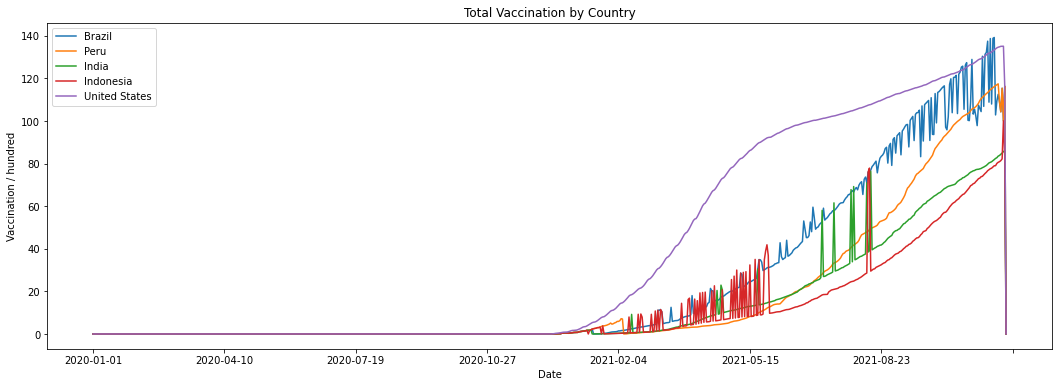

In [21]:
# Plotting data vaksinasi secara keseluruhan sejak covid-19 dimulai sampai 26 November 2021
# Sampel negara: Brazil, Peru, India, Indonesia, United States
plt.figure(figsize=(18,6))
vaccination.loc["Brazil"].plot()
vaccination.loc["Peru"].plot()
vaccination.loc["India"].plot()
vaccination.loc["Indonesia"].plot()
vaccination.loc["United States"].plot()
plt.title('Total Vaccination by Country')
plt.xlabel('Date')
plt.ylabel('Vaccination / hundred')
plt.legend()

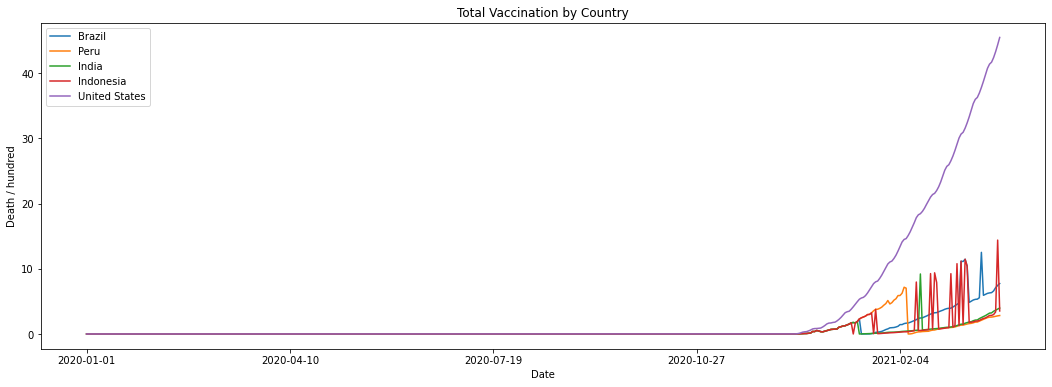

In [22]:
# Menganalisis data vaksinasi 450 hari setelah dimulainya penyebaran covid-19
plt.figure(figsize=(18,6))
vaccination.loc["Brazil"][:450].plot()
vaccination.loc["Peru"][:450].plot()
vaccination.loc["India"][:450].plot()
vaccination.loc["Indonesia"][:450].plot()
vaccination.loc["United States"][:450].plot()
plt.title('Total Vaccination by Country')
plt.xlabel('Date')
plt.ylabel('Death / hundred')
plt.legend()

### Tahap 4.1.2: Menghitung curva derivative 

Text(0, 0.5, 'Vaccination / million')

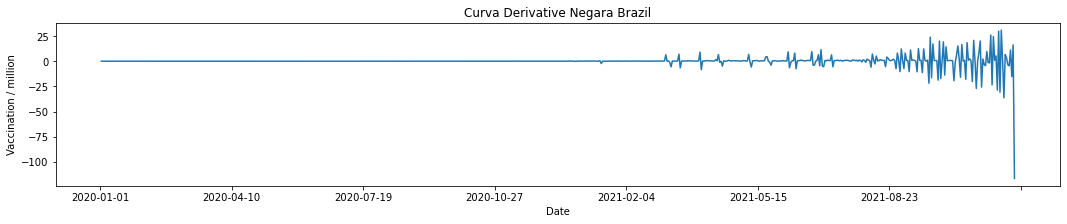

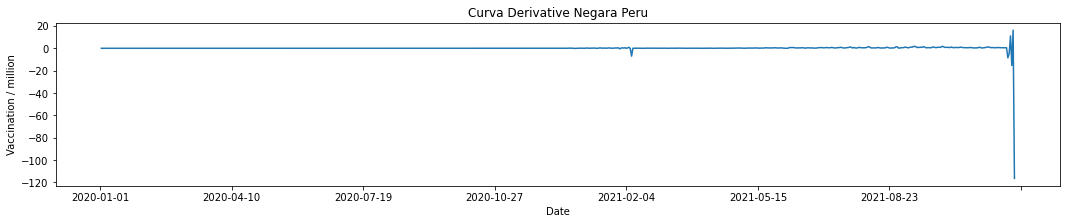

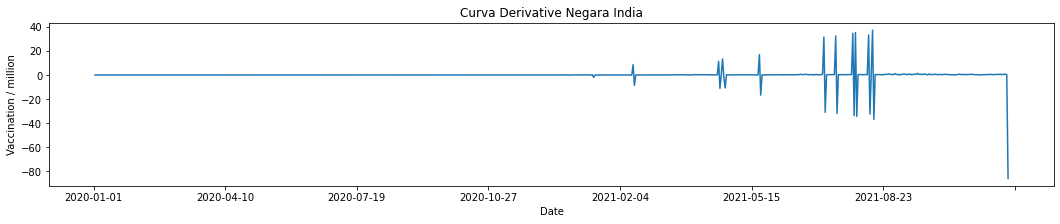

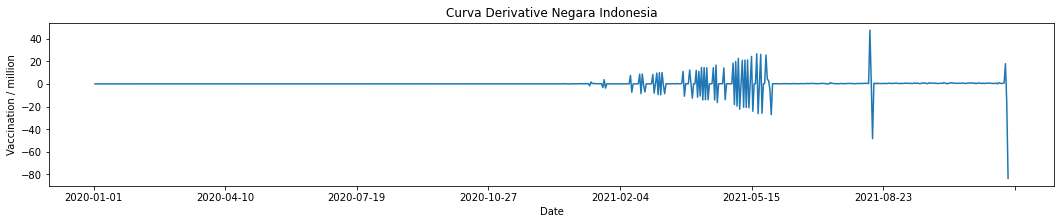

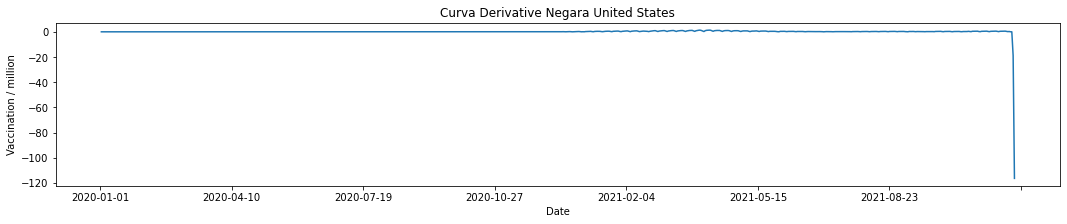

In [23]:
# Negara: Brazil
plt.figure(1,figsize=(18,3))
vaccination.loc["Brazil"].diff().plot()
plt.title('Curva Derivative Negara Brazil')
plt.xlabel('Date')
plt.ylabel('Vaccination / million')

# Negara: Peru
plt.figure(2,figsize=(18,3))
vaccination.loc["Peru"].diff().plot()
plt.title('Curva Derivative Negara Peru')
plt.xlabel('Date')
plt.ylabel('Vaccination / million')

# Negara: India
plt.figure(3,figsize=(18,3))
vaccination.loc["India"].diff().plot()
plt.title('Curva Derivative Negara India')
plt.xlabel('Date')
plt.ylabel('Vaccination / million')

# Negara: Indonesia
plt.figure(4,figsize=(18,3))
vaccination.loc["Indonesia"].diff().plot()
plt.title('Curva Derivative Negara Indonesia')
plt.xlabel('Date')
plt.ylabel('Vaccination / million')

# Negara: United States
plt.figure(5,figsize=(18,3))
vaccination.loc["United States"].diff().plot()
plt.title('Curva Derivative Negara United States')
plt.xlabel('Date')
plt.ylabel('Vaccination / million')

### Tahap 4.1.3: Menghitung Rata-Rata dan Maximum Vaksinasi 

In [24]:
print("Pemberian vaksinasi negara Brazil")
print("Rata-Rata : ",vaccination.loc["Brazil"].mean())
print("Maximum   : ",vaccination.loc["Brazil"].max())
print("")
print("Pemberian vaksinasi negara Peru")
print("Rata-Rata : ",vaccination.loc["Peru"].mean())
print("Maximum   : ",vaccination.loc["Peru"].max())
print("")
print("Pemberian vaksinasi negara India")
print("Rata-Rata : ",vaccination.loc["India"].mean())
print("Maximum   : ",vaccination.loc["India"].max())
print("")
print("Pemberian vaksinasi negara Indonesia")
print("Rata-Rata : ",vaccination.loc["Indonesia"].mean())
print("Maximum   : ",vaccination.loc["Indonesia"].max())
print("")
print("Pemberian vaksinasi negara United States")
print("Rata-Rata : ",vaccination.loc["United States"].mean())
print("Maximum   : ",vaccination.loc["United States"].max())

Pemberian vaksinasi negara Brazil
Rata-Rata :  23.355314435332915
Maximum   :  139.24

Pemberian vaksinasi negara Peru
Rata-Rata :  16.617944311715963
Maximum   :  117.46

Pemberian vaksinasi negara India
Rata-Rata :  13.760914657706113
Maximum   :  86.01

Pemberian vaksinasi negara Indonesia
Rata-Rata :  11.856167431897825
Maximum   :  100.08592920353978

Pemberian vaksinasi negara United States
Rata-Rata :  38.03400017959772
Maximum   :  135.12


### Tahap 4.1.4: Menghitung Rata-Rata dan Maximum Vaksinasi semua negara 

In [25]:
countries = list(vaccination.index)
mean_vaccination = []
max_vaccination = []
for c in countries:
    mean_vaccination.append(vaccination.loc[c].mean())
    max_vaccination.append(vaccination.loc[c].max())
vaccination["mean_vaccination"] = mean_vaccination
vaccination["max_vaccination"] = max_vaccination
vaccination.head()

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,mean_vaccination,max_vaccination
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.437545,12.840000,108.938482,104.317712,115.404182,100.085929,116.324125,0.0,21.490533,116.324125
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.250000,16.430000,16.570000,16.640000,16.720000,16.970000,16.980000,0.0,2.320532,16.980000
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.437545,112.540211,71.370000,104.317712,115.404182,72.210000,72.460000,0.0,17.244159,115.404182
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.437545,112.540211,26.920000,26.970000,115.404182,100.085929,116.324125,0.0,22.067419,116.324125
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.437545,112.540211,108.938482,104.317712,115.404182,100.085929,116.324125,0.0,24.063521,135.140000


### Tahap 4.1.5: Menampilkan Rata-Rata dan Maximum Vaksinasi semua negara 

In [26]:
vaccination = pd.DataFrame(vaccination[["mean_vaccination","max_vaccination"]])
vaccination.head()

date,mean_vaccination,max_vaccination
location,,
Afghanistan,21.490533,116.324125
Africa,2.320532,16.980000
Albania,17.244159,115.404182
Algeria,22.067419,116.324125
Andorra,24.063521,135.140000


### Tahap 5.1 : Pengolahan data Cardiovascular Death Rate

In [27]:
#cek nilai yang hilang / missing values di dalam data
print(cardiovasc_death_rate.isna().sum())

date
2020-01-01    234
2020-01-02    234
2020-01-03    234
2020-01-04    233
2020-01-05    233
             ... 
2021-11-22     49
2021-11-23     49
2021-11-24     49
2021-11-25     49
2021-11-26     50
Length: 696, dtype: int64


In [28]:
# mengganti missing value dengan mean(), kemudian masukkan ke variabel
cardiovasc_death_rate = cardiovasc_death_rate.fillna(vaccination.mean())
# bila mean() tidak ada atau Nan, gantikan dengan nol
cardiovasc_death_rate.fillna(0,inplace=True)
cardiovasc_death_rate

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070,233.070
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003,495.003


In [29]:
# Ukuran baris dan kolom
cardiovasc_death_rate.shape

(237, 696)

### Tahap 4.1.1: Visualizing data cardiovasc_death_rate, contoh: Brazil, Peru, India, Indonesia, United States
Visualisasi penting untuk memahami data.

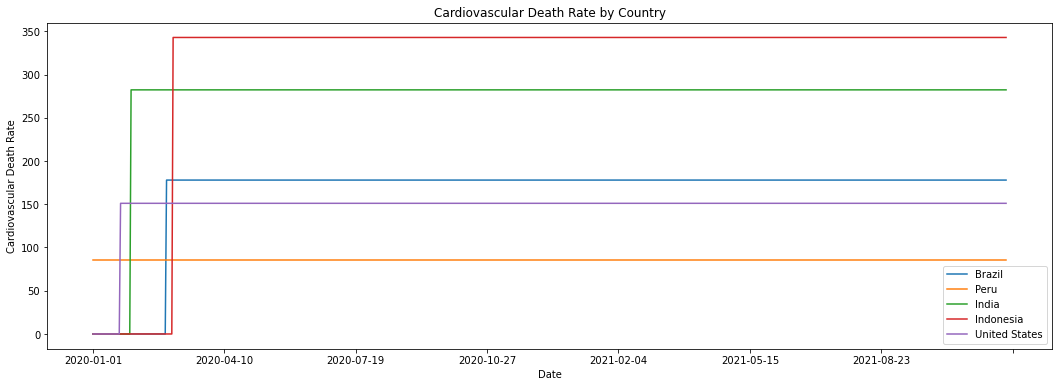

In [30]:
# Plotting data life expectancy secara keseluruhan sejak covid-19 dimulai sampai 26 November 2021
# Sampel negara: Brazil, Peru, India, Indonesia, United States
plt.figure(figsize=(18,6))
cardiovasc_death_rate.loc["Brazil"].plot()
cardiovasc_death_rate.loc["Peru"].plot()
cardiovasc_death_rate.loc["India"].plot()
cardiovasc_death_rate.loc["Indonesia"].plot()
cardiovasc_death_rate.loc["United States"].plot()
plt.title('Cardiovascular Death Rate by Country')
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate')
plt.legend()

### Tahap 4.1.2: Menghitung Data Maximum Cardiovascular Death Rate semua negara 

In [31]:
countries = list(cardiovasc_death_rate.index)
max_cardiovasc_death_rate = []
for c in countries:
    max_cardiovasc_death_rate.append(cardiovasc_death_rate.loc[c].max())
cardiovasc_death_rate["max_cardiovasc_death_rate"] = max_cardiovasc_death_rate
cardiovasc_death_rate.head()

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,max_cardiovasc_death_rate
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029,597.029
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195,304.195
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364,278.364
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135,109.135


### Tahap 4.1.3: Menampilkan Data Maximum  Cardiovascular Death Rate semua negara 

In [32]:
cardiovasc_death_rate = pd.DataFrame(cardiovasc_death_rate["max_cardiovasc_death_rate"])
cardiovasc_death_rate.head()

,max_cardiovasc_death_rate
location,
Afghanistan,597.029
Africa,0.000
Albania,304.195
Algeria,278.364
Andorra,109.135


## World Happiness Report Dataset :

### Tahap 5: Import data World Happiness Report Dataset

In [33]:
# Data diambil dari sumber (https://worldhappiness.report/)
df = pd.read_csv("WHR2021.csv",delimiter=';') 
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [35]:
# Mengambil kolom dominan untuk mengolah data world happinest report
happiness_report = pd.DataFrame(df[["Country name","Logged GDP per capita","Social support", "Healthy life expectancy","Freedom to make life choices"]])

In [36]:
# Ukuran file: baris dan kolom
happiness_report.shape

(149, 5)

In [37]:
# Membuat indeks dataframe dengan menggunakan kolom 'Country name'
happiness_report.set_index("Country name", inplace=True)
happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.775,0.954,72.0,0.949
Denmark,10.933,0.954,72.7,0.946
Switzerland,11.117,0.942,74.4,0.919
Iceland,10.878,0.983,73.0,0.955
Netherlands,10.932,0.942,72.4,0.913


### Task 5.1: Mempersiapkan join dua dataset 

#### Mortality by infection rate dataset

In [38]:
mortality.head()

,max_infection_rate
location,
Afghanistan,3.9920
Africa,1.5155
Albania,7.3100
Algeria,1.5155
Andorra,77.5650


In [39]:
# Ukuran file: baris dan kolom
mortality.shape

(237, 1)

#### World Happiness Report

In [40]:
happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.775,0.954,72.0,0.949
Denmark,10.933,0.954,72.7,0.946
Switzerland,11.117,0.942,74.4,0.919
Iceland,10.878,0.983,73.0,0.955
Netherlands,10.932,0.942,72.4,0.913


In [41]:
# Ukuran file: baris dan kolom
happiness_report.shape

(149, 4)

In [42]:
# joint antara mortality dengan happiness_report
data = mortality.join(happiness_report,how="inner")
data.head()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,3.9920,7.695,0.463,52.493,0.382
Albania,7.3100,9.520,0.697,68.999,0.785
Algeria,1.5155,9.342,0.802,66.005,0.480
Argentina,73.4770,9.962,0.898,69.000,0.828
Armenia,23.5840,9.487,0.799,67.055,0.825


### Tahap 5.2: correlation matrix 

In [43]:
# Matriks korelasi
data.corr(method ='pearson')

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.097424,0.156220,0.113182,0.085415
Logged GDP per capita,0.097424,1.000000,0.788899,0.869593,0.435817
Social support,0.156220,0.788899,1.000000,0.730081,0.482245
Healthy life expectancy,0.113182,0.869593,0.730081,1.000000,0.465857
Freedom to make life choices,0.085415,0.435817,0.482245,0.465857,1.000000


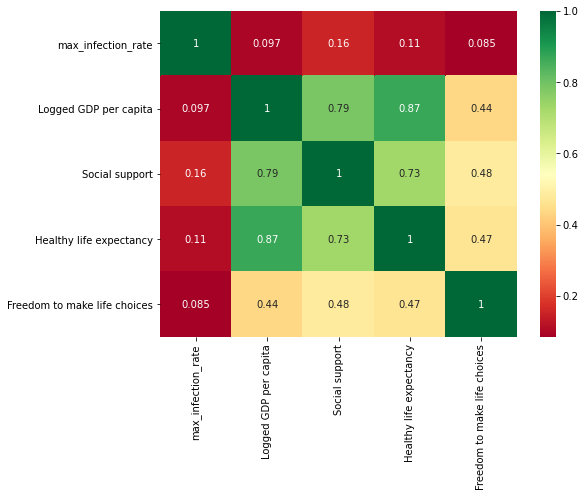

In [44]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = data.corr(method ='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(8,6))

# plot heatmap
h = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Tahap 5.3: Visualization  
Melihat visualisasi antara variabel

In [45]:
data.head()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,3.9920,7.695,0.463,52.493,0.382
Albania,7.3100,9.520,0.697,68.999,0.785
Algeria,1.5155,9.342,0.802,66.005,0.480
Argentina,73.4770,9.962,0.898,69.000,0.828
Armenia,23.5840,9.487,0.799,67.055,0.825


### Task 5.3.1: Plotting GDP vs maximum Infection rate

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_infection_rate'>

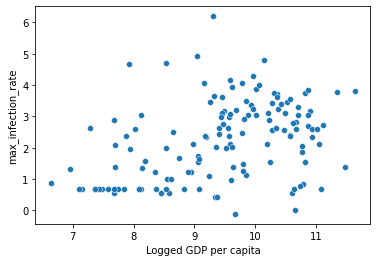

In [46]:
# Plotting GDP vs maximum Infection rate
x = data["Logged GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='max_infection_rate'>

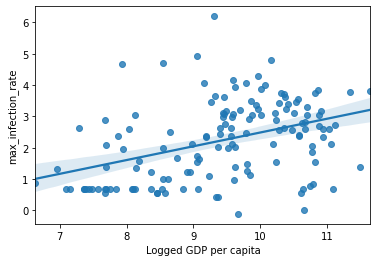

In [47]:
# plot data estimasi model regresi
sns.regplot(x,np.log(y))

### Task 5.3.2: Plotting Social support vs maximum Infection rate

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

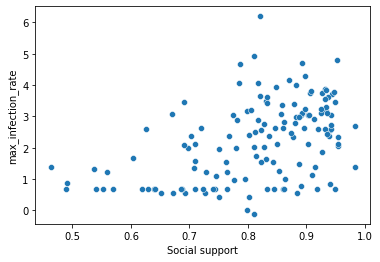

In [48]:
# Plotting Social support vs maximum Infection rate
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

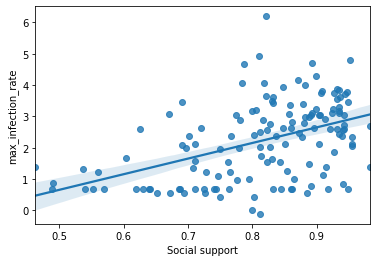

In [49]:
# plot data estimasi model regresi
sns.regplot(x,np.log(y))

### Task 5.3.3: Plotting Healthy life expectancy vs maximum Infection rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

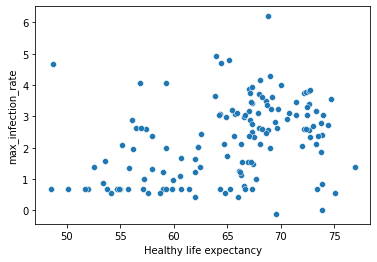

In [50]:
# Plotting Healthy life expectancy vs maximum Infection rate 
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

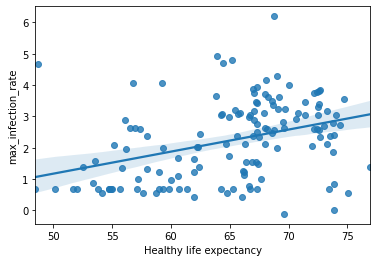

In [51]:
# plot data estimasi model regresi
sns.regplot(x,np.log(y))

### Kesimpulan

In [52]:
# 1. Tingkat mortality (kematian) diakibatkan oleh faktor:
#    - vaksinasi (penanganan vaksinasi yang responsif)
#    - penyakit Cardiovaskular bawaan dari individu yang turut memberi andil dalam mortality
#
# 2. Tingkat mortality juga dipengaruhi oleh rate infection yang tinggi.
# 3. Factor Happiness (Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices)
#    juga menjadi faktor mortality (kemation) dunia. Negara yang mempunyai GDP lebih tinggi, 
#    lebih cepat dalam penanganan covid-19 <pemberian vaksinasi lebih awal>.